In [10]:
import pandas
import configparser
import psycopg2

In [11]:
config = configparser.ConfigParser()
config.read('config.ini')

db = config ['myaws']['db']
host = config['myaws']['host']
user = config['myaws']['user']
pwd = config['myaws']['pwd']  

In [12]:
con = psycopg2.connect(
        host = host,
        user=user,
        password=pwd,
        dbname=db)

In [13]:
sql="""select*from student"""

In [14]:
df=pandas.read_sql_query(sql,con)

df[:]

/tmp/ipykernel_9885/1769558410.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,con)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [15]:
sql="""select professor.p_name,course.c_name
from professor 
inner join course 
on professor.p_email=course.p_email
"""

In [16]:
df=pandas.read_sql_query(sql,con)

df[:]

/tmp/ipykernel_9885/1769558410.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,con)


,p_name,c_name
0,p1,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [17]:
sql="""select c_number, count(*) as num_student
from enroll 
group by c_number
order by num_student desc """

/tmp/ipykernel_9885/3398583133.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,con)


<Axes: xlabel='c_number'>

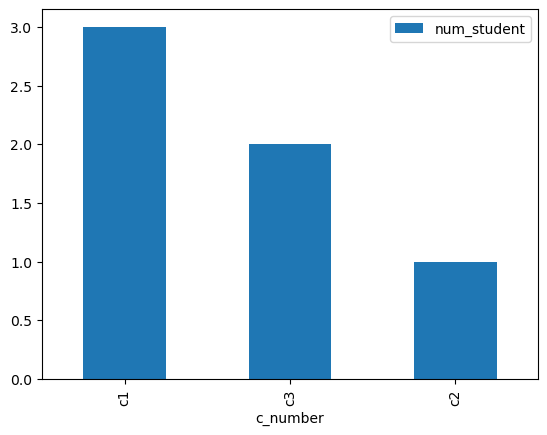

In [22]:
df=pandas.read_sql_query(sql,con)
df.plot.bar(x='c_number',y='num_student')

In [24]:
"""select professor.p_name,
count (course.c_name)as teaching_number
from professor 
inner join course
on professor.p_email=course.p_email"""

'select professor.p_name,\ncount (course.c_name)as teaching_number\nfrom professor \ninner join course\non professor.p_email=course.p_email'

/tmp/ipykernel_9885/3398583133.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,con)


<Axes: xlabel='c_number'>

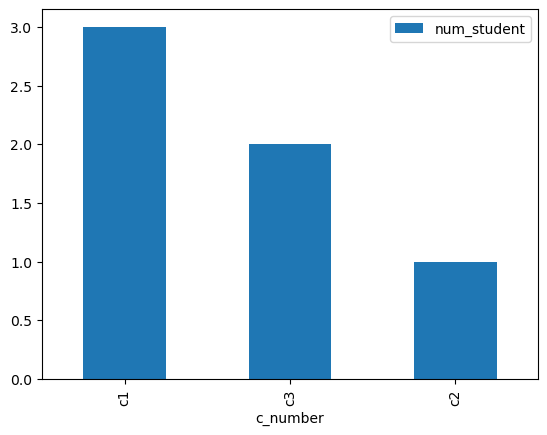

In [25]:
df=pandas.read_sql_query(sql,con)
df.plot.bar(x='c_number',y='num_student')

In [45]:
sql="""
SELECT professor.p_name,count(*)as num_courses_taught
from professor
inner JOIN course ON professor.p_email=course.p_email
group By professor.p_name
order BY num_courses_taught DESC
"""

/tmp/ipykernel_9885/232747334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,con)


<Axes: xlabel='p_name'>

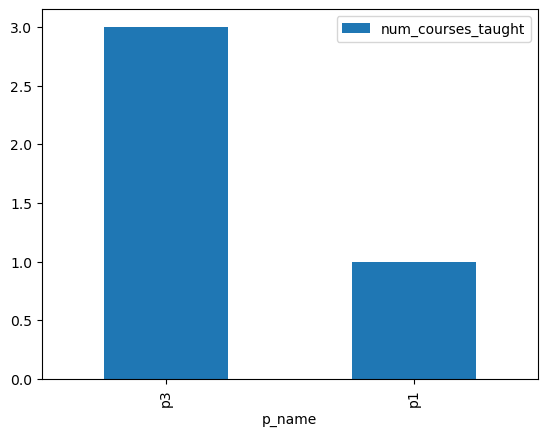

In [46]:
df=pandas.read_sql_query(sql,con)
df.plot.bar(x='p_name', y='num_courses_taught')

In [51]:
cur=con.cursor()

In [52]:
sql="""
insert into professor(p_email,p_name,office)
values ('p4@jmu.edu','p4','o4')"""

In [53]:
con.commit()

In [54]:
df=pandas.read_sql_query('select*from professor',con)
df[:]

/tmp/ipykernel_9885/387276487.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select*from professor',con)


,p_email,p_name,office
0,p2@jmu.edu,p1,o2
1,p3@jmu.edu,p3,o3


In [55]:
sql="""insert inot course (c_number,c_name,room,p_email)
values('c5','linkedin''r2','p4@jmu.edu')"""

In [56]:
cur.execute(sql)

SyntaxError: syntax error at or near "inot"
LINE 1: insert inot course (c_number,c_name,room,p_email)
               ^


In [57]:
con.rollback()

In [58]:
cur

<cursor object at 0x7ff1ba75d4e0; closed: 0>

In [63]:
df=pandas.read_sql_query('select *from course',con)
df[:]

/tmp/ipykernel_9885/2438870110.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select *from course',con)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
